## Pandas
Pandas is an open-source library that is made mainly for working with relational or labeled data both easily and intuitively. It provides various data structures and operations for manipulating numerical data and time series. This library is built on top of the NumPy library. Pandas is fast and it has high performance & productivity for users.

In [199]:
import pandas as pd
import numpy as np

#### Python libraries for visualization

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

#### Load the datasets

In [201]:
# Read the datasets from the github repo
train = pd.read_csv('https://raw.githubusercontent.com/thembani47/loan_default_prediction/main/Data/train_LZV4RXX.csv')
test = pd.read_csv('https://raw.githubusercontent.com/thembani47/loan_default_prediction/main/Data/test_4zJg83n.csv')
sample = pd.read_csv('https://raw.githubusercontent.com/thembani47/loan_default_prediction/main/Data/sample_submission_tbPU9qQ.csv')

## Understand the data

In [202]:
#check the shape of the data
shape = {
    'Train': train.shape,'test': test.shape,'Sample Sub': sample.shape
    }
#store the results inside a pandas data frame
df_shape = pd.DataFrame(list(shape.items()), columns=['Data Frame', 'Shape'])
df_shape

,Data Frame,Shape
0,Train,"(7000, 10)"
1,test,"(3000, 9)"
2,Sample Sub,"(3000, 2)"


In [203]:
print('Train')
display(train.sample(5))
print('-------------------------------------------------------------------------------------------------------------------------------')
print('Test')
display(test.sample(5))
print('-------------------------------------------------------------------------------------------------------------------------------')
print('Sample submission')
display(sample.sample(5))

Train


,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
5436,5437,35,2.0,Aadhar,646536,759036,0,0,0,1
230,231,34,1.0,Aadhar,578988,799920,0,0,0,1
6481,6482,38,1.0,Aadhar,592188,880200,0,0,0,0
2188,2189,38,2.0,Aadhar,699108,1157076,18,6,0,0
2852,2853,42,2.0,Aadhar,582588,776400,0,0,0,0


-------------------------------------------------------------------------------------------------------------------------------
Test


,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
2204,9205,26,1.0,Aadhar,988632,1187640,2,0,0
2481,9482,36,1.0,Aadhar,627636,786948,0,0,0
2365,9366,31,2.0,VoterID,877716,1270704,0,0,0
863,7864,40,2.0,Aadhar,603636,786000,10,7,0
131,7132,48,2.0,Aadhar,636936,774720,5,3,0


-------------------------------------------------------------------------------------------------------------------------------
Sample submission


,loan_id,loan_default
1669,8670,1
709,7710,1
2170,9171,1
947,7948,1
1336,8337,1


#### The describe () 
method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values.

In [204]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_id,7000.0,3500.500000,2020.870275,1.0,1750.75,3500.5,5250.25,7000.0
age,7000.0,36.096571,7.587700,21.0,29.00,36.0,43.00,50.0
education,6755.0,1.561954,0.496184,1.0,1.00,2.0,2.00,2.0
loan_amount,7000.0,663355.172571,149812.773669,167880.0,577788.00,657108.0,737364.00,1781376.0
asset_cost,7000.0,916299.750857,214492.244573,473352.0,797901.00,858426.0,957675.00,2419200.0
no_of_loans,7000.0,2.853286,5.471932,0.0,0.00,0.0,3.00,109.0
no_of_curr_loans,7000.0,1.371143,2.189278,0.0,0.00,0.0,2.00,33.0
last_delinq_none,7000.0,0.013286,0.114504,0.0,0.00,0.0,0.00,1.0
loan_default,7000.0,0.400000,0.489933,0.0,0.00,0.0,1.00,1.0


In [205]:
# features correlation with the target
train.corr()['loan_default'].sort_values(ascending=True)

no_of_curr_loans   -0.057306
no_of_loans        -0.045738
age                -0.029571
loan_id             0.011921
last_delinq_none    0.014772
education           0.041701
asset_cost          0.048020
loan_amount         0.115736
loan_default        1.000000
Name: loan_default, dtype: float64

There is no strong positive/negetive relationship between all the features with the target

In [206]:
train['last_delinq_none'].value_counts()

0    6907
1      93
Name: last_delinq_none, dtype: int64

In [207]:
# Drop unwanted features
train = train.drop(['last_delinq_none'], axis=1)
test = test.drop(['last_delinq_none'], axis=1)

#### Lets look at our target feature

In [208]:
train['loan_default'].unique()

array([0, 1])

In [209]:
train['loan_default'].value_counts()

0    4200
1    2800
Name: loan_default, dtype: int64

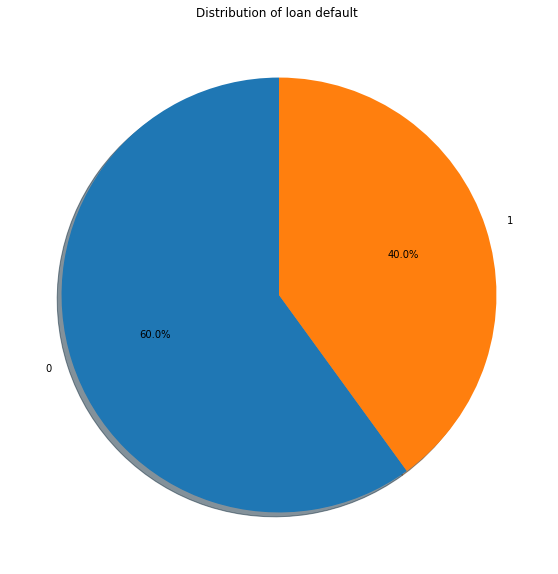

In [210]:
# plot a pie chart
plt.figure (figsize= (16,10))
sns.color_palette("crest", as_cmap=True)
values = train['loan_default'].value_counts()/train.shape[0]
labels = (train['loan_default'].value_counts()/train.shape[0]).index
plt.pie(x=values, labels=[0, 1], autopct='%1.1f%%', startangle=90,shadow=True)
plt.title("Distribution of loan default ")
plt.show()

There is imbalanced classes in our target feature

#### Check for missing values

In [211]:
train.isna().sum()

loan_id               0
age                   0
education           245
proof_submitted       0
loan_amount           0
asset_cost            0
no_of_loans           0
no_of_curr_loans      0
loan_default          0
dtype: int64

In [212]:
train.education.value_counts()

2.0    3796
1.0    2959
Name: education, dtype: int64

In [213]:
test.education.value_counts()

2.0    1639
1.0    1269
Name: education, dtype: int64

In [214]:
# Replace missing values with 1.0
#train = train.fillna(1.0)
#test = test.fillna(1.0)
train['education'].fillna(train['education'].mode()[0], inplace=True)
test['education'].fillna(test['education'].mode()[0], inplace=True)

In [215]:
train.education.value_counts()

2.0    4041
1.0    2959
Name: education, dtype: int64

#### Check the data types

In [216]:
train.dtypes

loan_id               int64
age                   int64
education           float64
proof_submitted      object
loan_amount           int64
asset_cost            int64
no_of_loans           int64
no_of_curr_loans      int64
loan_default          int64
dtype: object

In [217]:
# converting 'Weight' from float to int
train['education'] = train['education'].astype(int)
test['education'] = test['education'].astype(int)

In [218]:
#train['proof_submitted'].unique()

In [219]:
# Import label encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

train['proof_submitted']= label_encoder.fit_transform(train['proof_submitted'])
test['proof_submitted']= label_encoder.fit_transform(test['proof_submitted'])
train['proof_submitted'].unique()

array([0, 4, 1, 2, 3])

In [220]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
# Models
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, StackingClassifier

#### Split the data into features and labels

In [221]:
y = train['loan_default']
X = train.drop(['loan_default'], axis=1)

#### Splitting data arrays into two subsets: for training data and for testing data.

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model building

In [223]:
%%time
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(bootstrap= True,
                              max_depth= 100,
                              max_features= 'auto',
                              min_samples_leaf= 4,
                              min_samples_split= 5,
                              n_estimators= 1000)
# Train the model
clf.fit(X_train, y_train)

CPU times: user 7.89 s, sys: 36.4 ms, total: 7.92 s
Wall time: 7.97 s


#### Classification report
A classification report is a metric that allows us to see if our machine learning program is effective or not, and it does this through telling us the precision or accuracy of how the program predicts positives correctly and negatives correctly, as well as just the general prediction ability of positives and negatives overall.

In [224]:
pred = clf.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred))

print("Classification Report")
print(classification_report(y_test, pred))

Confusion Matrix:
[[711 158]
 [408 123]]
Classification Report
              precision    recall  f1-score   support

           0       0.64      0.82      0.72       869
           1       0.44      0.23      0.30       531

    accuracy                           0.60      1400
   macro avg       0.54      0.52      0.51      1400
weighted avg       0.56      0.60      0.56      1400



In [225]:
%%time
# build the lightgbm model
import lightgbm as lgb
c = lgb.LGBMClassifier()
c.fit(X_train, y_train)

CPU times: user 256 ms, sys: 11 ms, total: 267 ms
Wall time: 149 ms


In [226]:
p = c.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, p))

print("Classification Report")
print(classification_report(y_test, p))

Confusion Matrix:
[[684 185]
 [391 140]]
Classification Report
              precision    recall  f1-score   support

           0       0.64      0.79      0.70       869
           1       0.43      0.26      0.33       531

    accuracy                           0.59      1400
   macro avg       0.53      0.53      0.52      1400
weighted avg       0.56      0.59      0.56      1400



In [227]:
# Make predictions
predictions = clf.predict(test)
predictions

array([0, 0, 1, ..., 0, 1, 0])

## Create a submission file

In [228]:
sample

,loan_id,loan_default
0,7001,1
1,7002,1
2,7003,1
3,7004,1
4,7005,1
...,...,...
2995,9996,1
2996,9997,1
2997,9998,1
2998,9999,1


In [229]:
sample['loan_default'] = predictions

In [230]:
sample.to_csv('submission.csv', index = False)